In [549]:
from csv import reader
from sys import exit
from math import sqrt
from operator import itemgetter
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [548]:
Image(filename='./images/01_08.png', width=500) 

NameError: name 'Image' is not defined

In [551]:
iris = pd.read_csv('iris.csv')
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [552]:
iris = iris.sample(frac=1).reset_index(drop=True)
iris.columns=(['Sepal Length', 'Sepal Width', 'Petal Length' , 'Petal Width','type'])
iris.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,type
144,6.1,3.0,4.9,1.8,Iris-virginica
145,6.5,3.0,5.2,2.0,Iris-virginica
146,6.4,3.1,5.5,1.8,Iris-virginica
147,5.9,3.0,4.2,1.5,Iris-versicolor
148,5.5,2.4,3.8,1.1,Iris-versicolor


# At the first step , we want to write a knn program by ourselves to check the structure of model 

In [539]:
def get_classes(training_set):
    return training_set.type.unique()

def find_neighbors(distances, k):
    return distances[0:k]

def find_response(neighbors, classes):
    votes = {c:0 for c in classes}
    for instance in neighbors:
        for c in classes:
            if instance[-2] == c:
                votes[c] += 1
    print(votes,max(votes,key=votes.get))
    return max(votes,key=votes.get)

def knn(training_set, test_set, k):
    dist = 0
    classes = get_classes(training_set)
    training_set=np.array(training_set)
    test_set=np.array(test_set)
    limit = len(training_set[0])-1
    # generate response classes from training data
    predict=[]
    for test_instance in test_set:
        distances = []
        for row in training_set:
            test_x=test_instance[:-1]
            row_x=row[:-1]
            test_x=test_x.astype('float')
            row_x=row_x.astype('float')
            dist= np.sum((test_x-row_x)**2)
            distances.append(list(row)+[sqrt(dist)])
            dist = 0  
        print (len(distances))
        distances.sort(key=lambda x: x[-1])
    #    print (distances)
        # find k nearest neighbors
        neighbors = find_neighbors(distances, k)
            # get the class with maximum votes
        value = find_response(neighbors, classes)
            # Display prediction
#         print('The predicted class for sample ' + str(test_instance) + ' is : ' + value)
#         print('Number of votes : ' + str(value) + ' out of ' + str(k))
        print(test_instance[-1], value)
            # empty the distance list
        predict.append(value)  
       # print (distances)
    return predict  

#### training_set=iris[:100]
print (type(training_set))

In [540]:
distances = []
dist = 0
print (len(np.array(training_set)))

100


In [541]:
train_set=iris[:99]
test_set=iris[129:133]
predict=knn(train_set,test_set,8)
print (np.array(predict))

99
{'Iris-versicolor': 0, 'Iris-setosa': 8, 'Iris-virginica': 0} Iris-setosa
Iris-setosa Iris-setosa
99
{'Iris-versicolor': 0, 'Iris-setosa': 8, 'Iris-virginica': 0} Iris-setosa
Iris-setosa Iris-setosa
99
{'Iris-versicolor': 0, 'Iris-setosa': 0, 'Iris-virginica': 8} Iris-virginica
Iris-virginica Iris-virginica
99
{'Iris-versicolor': 0, 'Iris-setosa': 0, 'Iris-virginica': 8} Iris-virginica
Iris-virginica Iris-virginica
['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica']


# How to test the performance of model , we try to how to choose k 

In [519]:
list(iris)

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'type']

In [520]:
def performance (real,predict):
    label_predict=np.array(predict)
    label_real=np.array(real)[:,-1]
    error=0
    for t,p in zip(label_real,label_predict):
        print (t,p) 
        if t!=p:
            error+=1
    return error/len(label_real)
train_set=iris[:80]
test_set=iris[100:140]
error=performance(test_set,knn(train_set,test_set,11))
print (error)

{'Iris-virginica': 11, 'Iris-setosa': 0, 'Iris-versicolor': 0} Iris-virginica
Iris-virginica Iris-virginica
{'Iris-virginica': 4, 'Iris-setosa': 0, 'Iris-versicolor': 7} Iris-versicolor
Iris-versicolor Iris-versicolor
{'Iris-virginica': 0, 'Iris-setosa': 11, 'Iris-versicolor': 0} Iris-setosa
Iris-setosa Iris-setosa
{'Iris-virginica': 0, 'Iris-setosa': 11, 'Iris-versicolor': 0} Iris-setosa
Iris-setosa Iris-setosa
{'Iris-virginica': 10, 'Iris-setosa': 0, 'Iris-versicolor': 1} Iris-virginica
Iris-virginica Iris-virginica
{'Iris-virginica': 1, 'Iris-setosa': 0, 'Iris-versicolor': 10} Iris-versicolor
Iris-versicolor Iris-versicolor
{'Iris-virginica': 0, 'Iris-setosa': 0, 'Iris-versicolor': 11} Iris-versicolor
Iris-versicolor Iris-versicolor
{'Iris-virginica': 11, 'Iris-setosa': 0, 'Iris-versicolor': 0} Iris-virginica
Iris-virginica Iris-virginica
{'Iris-virginica': 0, 'Iris-setosa': 11, 'Iris-versicolor': 0} Iris-setosa
Iris-setosa Iris-setosa
{'Iris-virginica': 0, 'Iris-setosa': 11, 'Iris-

In [521]:
print (predict)

['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica']


In [522]:
iris=np.array(iris)
X = np.array(iris[:, :4])  # we only take the first two features.
X=X.astype(float)
Y = iris[:,-1]
#Y=Y.astype(int)
types=set(Y)
types

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

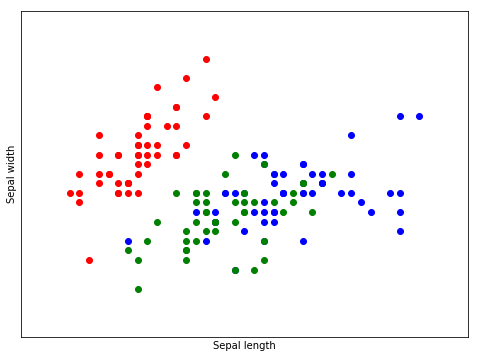

In [523]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
for (x,y) in zip(X,Y):
    if y=='Iris-setosa':
        c='r'
    if y=='Iris-versicolor':
        c='g'  
    if y=='Iris-virginica':
        c='b'    
    plt.scatter(x[0], x[1],color=c)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [542]:
from sklearn.preprocessing import StandardScaler
 
#标准化，返回值为标准化后的数据
data=StandardScaler().fit_transform(X)

In [ ]:
iris=iris.load()

In [525]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#选择K个最好的特征，返回选择特征后的数据
car=SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [526]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

ValueError: could not convert string to float: 'Iris-setosa'

In [527]:
knn_clf=KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', weights='distance', p=3)
score = cross_val_score(knn_clf,X,Y, cv=5)
score

array([ 0.9       ,  0.9       ,  0.96666667,  0.96666667,  1.        ])

In [363]:
knn_clf=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', weights='distance', p=3)
#score = cross_val_score(knn_clf,X_reduced,iris.target, cv=3)
#score

In [5]:
import scipy.io
mnist_train = scipy.io.loadmat('mnist_train.mat')
mnist_train_label = scipy.io.loadmat('mnist_train_labels.mat')
mnist_test = scipy.io.loadmat('mnist_test.mat')
mnist_test_label = scipy.io.loadmat('mnist_test_labels.mat')

In [13]:
train=mnist_train['mnist_train']
train_label=mnist_train_label['mnist_train_labels']
im=[i.reshape(28,28) for i in train]
print (len(train),len(train_label))
train=train
train_label=train_label.ravel()

60000 60000


In [14]:
train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [2]:
import numpy as np
def svd_pca(data, k):
    """Reduce DATA using its K principal components."""
    data = data.astype("float64")
    data -= np.mean(data, axis=0)
    U, S, V = np.linalg.svd(data, full_matrices=False)
    return U[:,:k].dot(np.diag(S)[:k,:k])
train_pca=svd_pca(train,50)

NameError: name 'train' is not defined

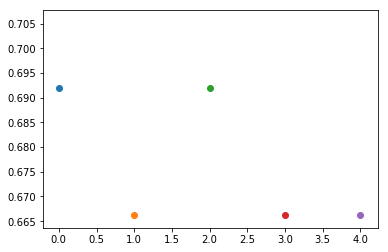

In [65]:
for i in range(5):
    train_pca=svd_pca(train,30+10*i)
    score = cross_val_score(knn_clf,train_pca[:50],train_label[:50], cv=3)
    plt.scatter(i,score.mean())
plt.show()

In [55]:
plt.figure()
plt.imshow(im[3])
plt.show()

NameError: name 'plt' is not defined

In [ ]:
knn_clf.fit(mnist_train,mnist_train_label)